# 기본 준비

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

In [49]:
# 오차행렬 및 평가지표 출력
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


# 임계값 조정
# def get_eval_by_threshold(y_test, pred, pred_proba_c1, thresholds):
#     pred_proba_c1 = pred_proba_c1.reshape(-1, 1)
#     for custom_threshold in thresholds:
#         bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
#         custom_predict = bina.transform(pred_proba_c1)
#         print('분류 임계값 :', custom_threshold)
#         get_clf_eval(y_test, pred, custom_predict)
def get_eval_by_threshold(y_test, pred, pred_proba_c1, thresholds):
    pred_proba_c1 = pred_proba_c1.reshape(-1, 1)
    for custom_threshold in thresholds:
        bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = bina.transform(pred_proba_c1)
        print('분류 임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1) #바뀐 부분 


# precision recall curve 그리기
def precision_recall_curve_plot(y_test, pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [50]:
brfss = pd.read_csv("../data/brfss.csv") #지금 쓰는 데이터.
# checkup = pd.read_csv("../data/checkup.csv") #지금은 안 씀. 좋은 모델 나오면 넣을 예정

### 데이터 분할

In [51]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1) #ALCOHOL은 안 쓰기로 해서 같이 뺐음. #독립
y = brfss["HEARTDISEASE"] # 종속

In [52]:
y.value_counts()

0.0    358424
1.0     20222
Name: HEARTDISEASE, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #X가 input, y가 target

# scaler #안씀
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote #smote는 불균형한 데이터에 대해서 숫자를 맞춰준다. #sklearn smote 검색해보자.
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286816
1.0    286816
Name: HEARTDISEASE, dtype: int64

# 할 일
- 하이퍼 파라미터 튜닝
    - 각 모델 document 보면서 찾아보기(linear regression의 경우 parameter라고 되어있는 부분. 그 사이트에서 1번째와 3번째만 설정해주면 됨.)
- 임계점 변경
    - 변경해보면서 최적값 찾기

# 박민정

## DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정 예시
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds) # pred는 X_test로 이진분류

0.7110940579381552
0.6567014393239139
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7696
분류 임계값 : 0.5
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7056
분류 임계값 : 0.55
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7048
분류 임계값 : 0.6
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.6923


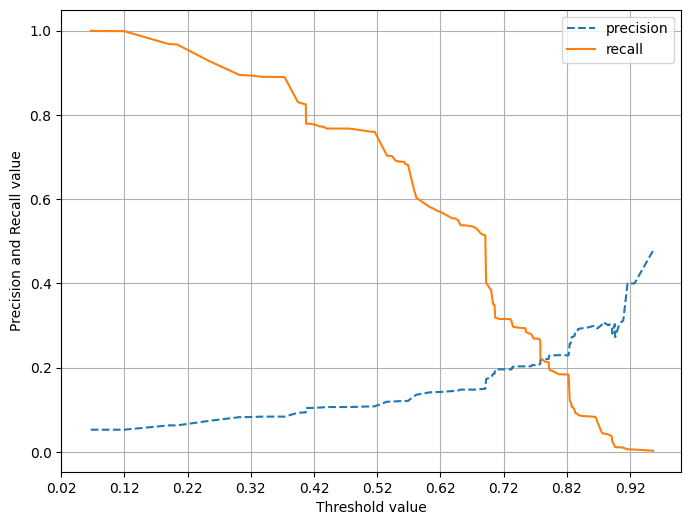

In [31]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## SGDClassifier

In [17]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss", max_iter=10)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7078343826848283
0.6706589198468242
오차 행렬
[[47835 23904]
 [ 1037  2954]]
정확도: 0.6707, 정밀도: 0.1100, 재현율: 0.7402, F1: 0.1915, AUC:0.7691


## SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 서대훈

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #선형회귀는 분류를 하는 알고리즘이 아니다. 분류를 1, 0으로 넣으면 0에 가까운 값을 만들고 1에 가까운 값을 만들겠다는 게 된다.
model.fit(X_train, y_train) #X가 input, y가 target

#기울기와 절편을 찾아내는 것이 선형회귀 알고리즘의 목적
print(model.coef_, model.intercept_) #특성별 기울기 9개와 절편값
#model.score(X_test, y_test)


print(model.score(X_train, y_train))
print(model.score(X_test, y_test))



[ 0.0808299  -0.02837408 -0.02276224  0.02549588  0.03482592  0.06061014
  0.1309127   0.02734977  0.0688589 ] 0.39990858803270196
0.22403821098507737
-2.7871204589812497


## LightGBM(머신러닝_5_3_2_LightGBM.ipynb)

In [76]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=100, max_depth=5, min_child_samples=15, num_leaves=9)

evals = [(X_test, y_test)]
model.fit(X_train, y_train,
         early_stopping_rounds=100,
         eval_metric = 'logloss',
         eval_set = evals,
         verbose = True)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test) #predict()는 그 데이터가 0이냐 1이냐 라벨로 결과를 주고
pred_proba = model.predict_proba(X_test)[:,1] #predict_proba는 0일 확률과 1일 확률을 둘이 합해서 1이 나오게끔 숫자를 각각 넘겨준다. 뒤에 [:,1]을 주는 이유는 0일 확률이나 1일 확률 중에 1일 확률 하나만 갖고오기 위함이다.

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정 예시 #임곗값은 머신러닝_04_0_0 참고
thresholds = [0.4, 0.5, 0.6, 0.625, 0.65, 0.675, 0.7, 0.8, 0.9]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds) # pred는 X_test로 이진분류

C:\anaconda3\envs\data_venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda3\envs\data_venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.671363
[2]	valid_0's binary_logloss: 0.653637
[3]	valid_0's binary_logloss: 0.638937
[4]	valid_0's binary_logloss: 0.626552
[5]	valid_0's binary_logloss: 0.615751
[6]	valid_0's binary_logloss: 0.607074
[7]	valid_0's binary_logloss: 0.599127
[8]	valid_0's binary_logloss: 0.592165
[9]	valid_0's binary_logloss: 0.585483
[10]	valid_0's binary_logloss: 0.580156
[11]	valid_0's binary_logloss: 0.575325
[12]	valid_0's binary_logloss: 0.571076
[13]	valid_0's binary_logloss: 0.566886
[14]	valid_0's binary_logloss: 0.563374
[15]	valid_0's binary_logloss: 0.559794
[16]	valid_0's binary_logloss: 0.555884
[17]	valid_0's binary_logloss: 0.552
[18]	valid_0's binary_logloss: 0.548429
[19]	valid_0's binary_logloss: 0.545873
[20]	valid_0's binary_logloss: 0.543476
[21]	valid_0's binary_logloss: 0.540095
[22]	valid_0's binary_logloss: 0.537092
[23]	valid_0's binary_logloss: 0.534304
[24]	valid_0's binary_logloss: 0.531947
[25]	valid_0's binary_logloss: 0.529856
[26]	valid_0

C:\anaconda3\envs\data_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[71608     0]
 [ 4122     0]]
정확도: 0.9456, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, AUC:0.7489


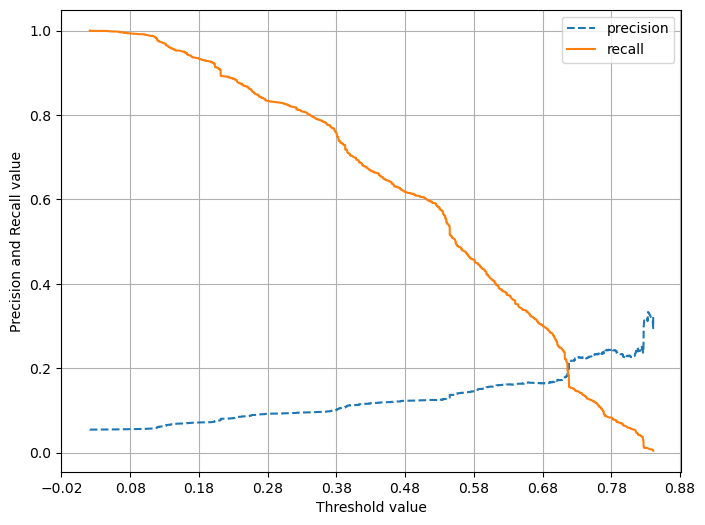

In [79]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105211755924352
0.6586293410801531
오차 행렬
[[46843 24883]
 [  969  3035]]
정확도: 0.6586, 정밀도: 0.1087, 재현율: 0.7580, F1: 0.1902, AUC:0.7665


# 손지호

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[47869 23870]
 [ 1042  2949]]
정확도: 0.6710, 정밀도: 0.1100, 재현율: 0.7389, F1: 0.1914, AUC:0.7695


## XGBClassifier

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105453987644508
0.6563977287732735
오차 행렬
[[46552 25036]
 [  985  3157]]
정확도: 0.6564, 정밀도: 0.1120, 재현율: 0.7622, F1: 0.1953, AUC:0.7698


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)